In [60]:
import torchvision.models as models
import torch

In [61]:
# Download the weights for the ResNet50
resnet50 = models.resnet50(pretrained=True, progress=True) 

# ResNet-50


In [62]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

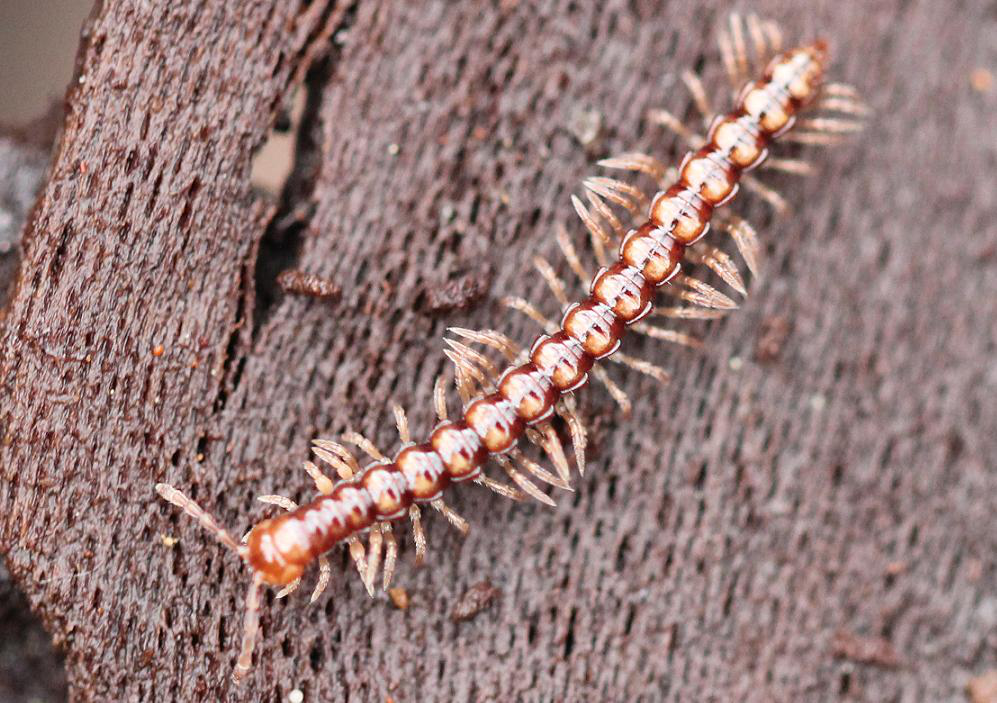

In [63]:
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

img = Image.open('centipede.jpg')
img

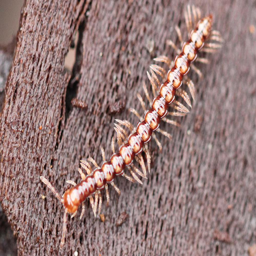

In [64]:
s = 255
img.resize((256,256))

In [65]:
from torchvision import transforms
transform = transforms.Compose([        # Defining a variable transforms
 transforms.Resize(256),                # Resize the image to 256×256 pixels
 transforms.CenterCrop(224),            # Crop the image to 224×224 pixels about the center
 transforms.ToTensor(),                 # Convert the image to PyTorch Tensor data type
 transforms.Normalize(                  # Normalize the image
 mean=[0.485, 0.456, 0.406],            # Mean and std of image as also used when training the network
 std=[0.229, 0.224, 0.225]      
 )])

In [66]:
img_t = transform(img)
img_t.shape

torch.Size([3, 224, 224])

In [67]:
batch_t = torch.unsqueeze(img_t, 0)

In [68]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [69]:
out = resnet50(batch_t)
out.shape

torch.Size([1, 1000])

In [70]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))
classes

Number of classes: 1000


['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [71]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('centipede', 99.95645904541016),
 ('coil, spiral, volute, whorl, helix', 0.005461018532514572),
 ('screw', 0.005119707435369492),
 ('ant, emmet, pismire', 0.00451884139329195),
 ('walking stick, walkingstick, stick insect', 0.0017277178121730685),
 ('lacewing, lacewing fly', 0.0017111183842644095),
 ('necklace', 0.0015473077073693275),
 ('safety pin', 0.0015461910516023636),
 ('cockroach, roach', 0.0013349264627322555),
 ('isopod', 0.001253912108950317)]

# ResNet-101


In [72]:
# Download the weights for the ResNet50
resnet101 = models.resnet101(pretrained=True, progress=True) 

In [73]:
resnet101.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [74]:
out = resnet101(batch_t)
out.shape

torch.Size([1, 1000])

In [75]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('centipede', 99.9758071899414),
 ('ant, emmet, pismire', 0.008284893818199635),
 ('isopod', 0.0029806396923959255),
 ('lacewing, lacewing fly', 0.0012436772231012583),
 ('screw', 0.0011646266793832183),
 ('trilobite', 0.0009019677527248859),
 ('cockroach, roach', 0.000890975003130734),
 ('nematode, nematode worm, roundworm', 0.0007835087017156184),
 ('scorpion', 0.000648117158561945),
 ('tick', 0.0005889052990823984)]

# ResNet-152


In [76]:
# Download the weights for the ResNet50
resnet152 = models.resnet152(pretrained=True, progress=True) 

In [77]:
resnet152.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [78]:
out = resnet152(batch_t)
out.shape

torch.Size([1, 1000])

In [79]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('centipede', 99.96485900878906),
 ('ant, emmet, pismire', 0.014837540686130524),
 ('nematode, nematode worm, roundworm', 0.006387416273355484),
 ('coil, spiral, volute, whorl, helix', 0.0027127391658723354),
 ('isopod', 0.0020014410838484764),
 ('necklace', 0.0009033866226673126),
 ('walking stick, walkingstick, stick insect', 0.0007881957571953535),
 ('cockroach, roach', 0.0005006366409361362),
 ('lacewing, lacewing fly', 0.00044467623229138553),
 ('tick', 0.00044118796358816326)]